In [30]:
import os   #linar regression for binary classes
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 1500x600 with 0 Axes>

In [23]:
iris_file = os.path.join(inpDir, 'iris.csv')
iris_features = ['sepal length',
                'sepal width',
                'petal length',
                'petal width','target']     # create list containing all column names
iris_df = pd.read_csv(iris_file,
                      skiprows = 1,        # ignore first row
                      sep = ',',            # using separator as ,
                      header = None,       # no column names
                      names = iris_features)       # use these column names
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# this code is not required

labels = iris_df['target']

num_classes = len(np.unique(labels))
palette = np.array(sns.color_palette("hls", num_classes))
palette

array([[0.86  , 0.3712, 0.34  ],
       [0.34  , 0.86  , 0.3712],
       [0.3712, 0.34  , 0.86  ]])

In [27]:
# Utility function to visualize the outputs of PCA and t-SNE
def fn_plot_digits(x, labels):
    '''
    Attrib:
        x: (dimentional data)
        labels: labels of the data
    Return:
    '''
    # choose a color palette with seaborn
    num_classes = len(np.unique(labels))       #How many classes are there
    palette = np.array(sns.color_palette("hls", num_classes))      #color by class
    
    # Instantiate figure and axis
    fig, ax = plt.subplots(figsize = (6,6))
    
    ax.set_aspect('auto')       # aspect ratio of x and y axis
    
    # Scatter plot of the data
    sc = ax.scatter(x[:,0], x[:,1], s = 15,
                   c = palette[labels.astype(np.int16)],      # Change color as per palette
                   
                   edgecolors = 'k')
    
    ax.axis('off')
    ax.axis('tight')
    
    # add the labels for each each digit corresponding to the label
    
    for i in  range(num_classes):
        
        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[labels == i, :], axis = 0)     # location the text
        
        txt = ax.text(xtext, ytext, str(i), fontsize = 20)     # Name of the class
        
        # draw a thick white border around
        txt.set_path_effects([
            PathEffects.Stroke(linewidth = 5, foreground = "w"),
            PathEffects.Normal()
        ])
        
    return

In [28]:
features = iris_df.drop('target', axis = 1).to_numpy()      # extract feature vector
labels = iris_df['target']        # extract labels

num_classes = np.unique(labels)

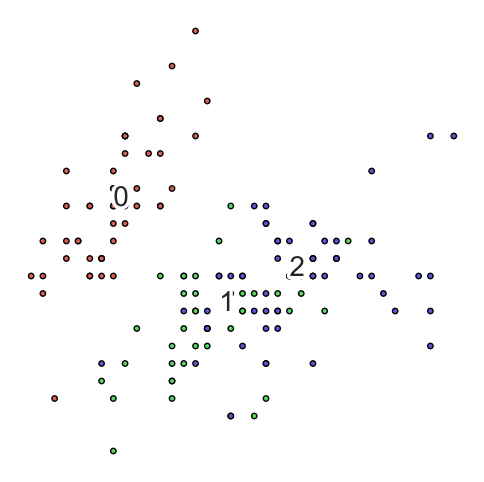

In [29]:
x = features[:,:2]        # take first two columns
fn_plot_digits(x, labels)       # plot iris dataset

In [31]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(features)

In [48]:
pca = PCA(n_components = 2)

x_pca = pca.fit_transform(features)

x_pca.shape

(150, 2)

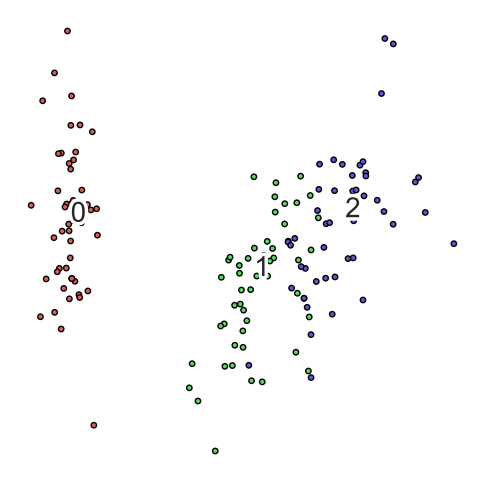

In [51]:
fn_plot_digits(x_pca, labels)

In [53]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [54]:
pca.explained_variance_ratio_.sum()

0.9580097536148198

### Manifold Learning

In [57]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

n_samples, n_features = X.shape

n_neighbors = 30

In [60]:
#pd.DataFrame(X)

Text(0.5, 0.98, 'A sample digit dataset')

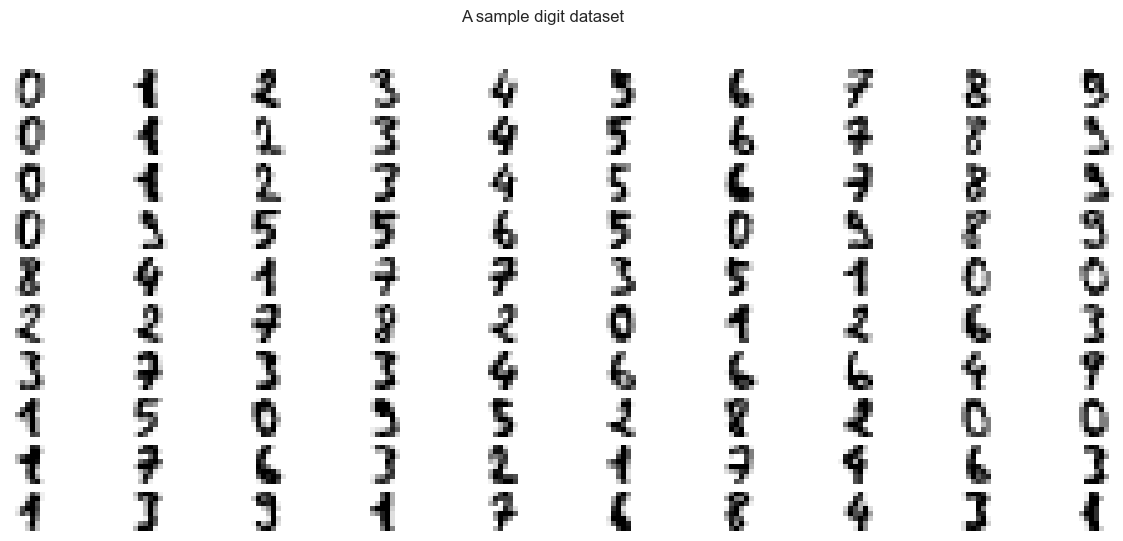

In [72]:
fig, axs = plt.subplots(nrows = 10, ncols = 10)

for idx, ax in enumerate(axs.ravel()):
    
    ax.imshow(X[idx].reshape((8,8)), cmap = plt.cm.binary)
    
    ax.axis("off")
    
fig.suptitle("A sample digit dataset")

In [73]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled.shape

(1797, 64)

In [74]:
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(1797, 2)

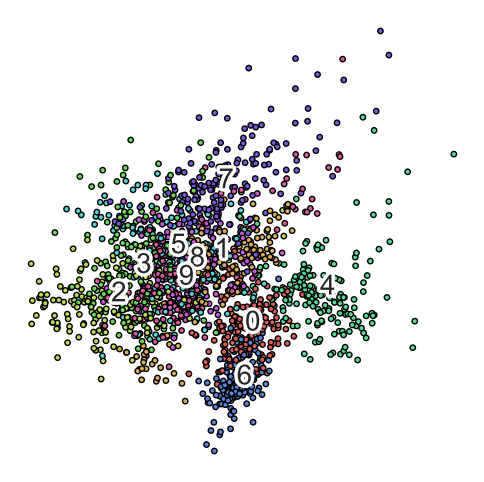

In [76]:
fn_plot_digits(X_pca, y)

In [77]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [78]:
pca.explained_variance_ratio_.sum()

0.21594970496786653

### LDA

In [83]:
lda = LinearDiscriminantAnalysis(n_components = 2)

data = X_scaled.copy()

data.flat[:: X_scaled.shape[1] + 1] += 0.01     # Make X invertible

projections = lda.fit_transform(data, y)

print(projections.shape)

(1797, 2)


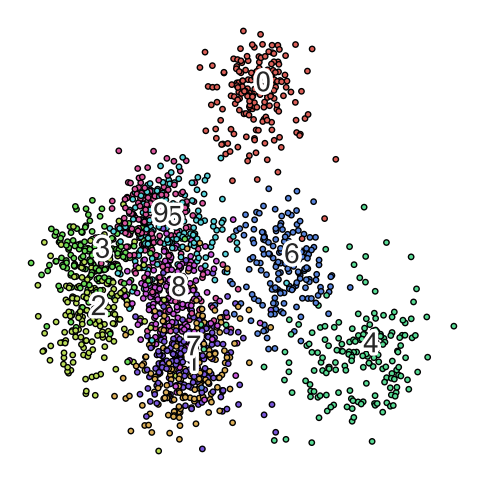

In [84]:
fn_plot_digits(projections, y)

In [89]:
for i in range(64):
    
    pca = PCA(n_components = i)

    X_pca = pca.fit_transform(X_scaled)
    
    print(f"{i}::{pca.explained_variance_ratio_.sum()}")


0::0.0
1::0.12033916097187687
2::0.21594970495862975
3::0.3003938527915824
4::0.36537792999642527
5::0.41397931625566575
6::0.45612053125213203
7::0.49549012189067965
8::0.5294067522970762
9::0.5592606719844754
10::0.5887144183227944
11::0.6165255640404481
12::0.6422593321039638
13::0.664935922925903
14::0.6873397659083934
15::0.7089824380531561
16::0.7280339057505507
17::0.745847479596214
18::0.7621933444848057
19::0.7780813130554881
20::0.7930770883909369
21::0.8065598663991561
22::0.8192494191668007
23::0.83091643389405
24::0.8414424474039469
25::0.8511838732480933
26::0.8606723790966504
27::0.8693376792285401
28::0.8776479430534883
29::0.8856420786463892
30::0.8931542853833383
31::0.90041039059163
32::0.907370154904989
33::0.9138977127008076
34::0.9202911479540392
35::0.9262194609114172
36::0.9319342302555774
37::0.9371549228856738
38::0.9419944563008479
39::0.946529680636499
40::0.9507681954896309
41::0.9548133814131669
42::0.9587968674472264
43::0.9623571031203048
44::0.965777747

In [90]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

n_samples, n_features = X.shape

n_neighbors = 30

mean=(X.sum(axis=0)/X.shape[0])/X.shape[0]

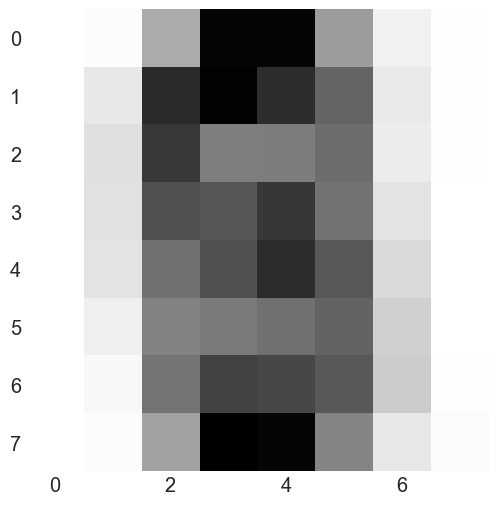

In [93]:
plt.grid(visible=None)
plt.imshow(mean.reshape(8,8))

In [107]:
X[4].reshape(8,8)

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

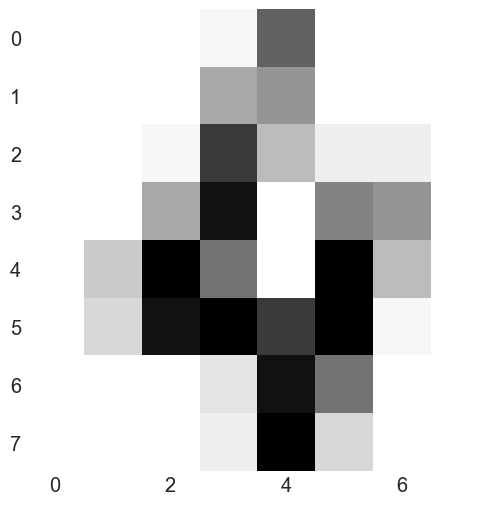

In [109]:
plt.grid(visible=None)
plt.imshow(X[4].reshape(8,8))